In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d puneet6060/intel-image-classification

 96% 334M/346M [00:02<00:00, 129MB/s]
100% 346M/346M [00:03<00:00, 120MB/s]


In [3]:
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

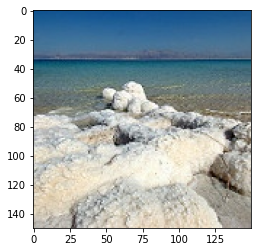

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
train_path='/content/seg_train/seg_train'
categories=os.listdir(train_path)
for category in categories:
  path=os.path.join(train_path,category)
  class_label=categories.index(category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    colored=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    resized=cv2.resize(colored,(150,150))
    plt.imshow(resized)
    break
  break

In [5]:
train_data=[]
label_data=[]
def create_training():
  for category in categories:
    path=os.path.join(train_path,category)
    class_label=categories.index(category)
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img))
      colored=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
      resized=cv2.resize(colored,(150,150))
      train_data.append(resized)
      label_data.append(class_label)
create_training()


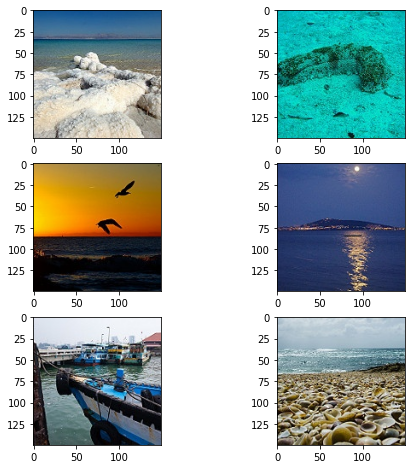

In [6]:
plt.figure(figsize=(8,8))
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.imshow(train_data[i])
plt.show()

In [8]:
len(train_data)

14034

In [9]:
import torch
import torchvision.datasets as datasets
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


In [10]:
class loadData(Dataset):
  def __init__(self,transform):
    self.x=train_data
    self.y=label_data
    self.transform=transform

  def __getitem__(self,idx):
    image=self.x[idx]
    image=self.transform(image)
    label=self.y[idx]
    return image,label

  def __len__(self):
    return len(self.x)

data_transformation=transforms.ToTensor()

training_data=loadData(transform=data_transformation)


In [11]:
train_loader=DataLoader(training_data,batch_size=16,shuffle=True)
len(train_loader)


878

In [12]:
img,label=next(iter(train_loader))

img[0]

tensor([[[0.9098, 0.9137, 0.8353,  ..., 0.5137, 0.4000, 0.4118],
         [0.8667, 0.7765, 0.6745,  ..., 0.4902, 0.4078, 0.3569],
         [0.4157, 0.3294, 0.3216,  ..., 0.5137, 0.4549, 0.3843],
         ...,
         [0.4471, 0.4510, 0.4745,  ..., 0.1765, 0.1882, 0.1765],
         [0.4078, 0.4235, 0.4471,  ..., 0.2000, 0.2000, 0.1961],
         [0.4000, 0.4118, 0.4235,  ..., 0.2196, 0.2157, 0.2118]],

        [[1.0000, 1.0000, 0.9373,  ..., 0.6275, 0.4941, 0.5059],
         [0.9412, 0.8588, 0.7490,  ..., 0.5961, 0.5059, 0.4549],
         [0.4275, 0.3490, 0.3373,  ..., 0.6235, 0.5569, 0.4784],
         ...,
         [0.4667, 0.4706, 0.4863,  ..., 0.2275, 0.2353, 0.2235],
         [0.4353, 0.4549, 0.4667,  ..., 0.2510, 0.2471, 0.2431],
         [0.4353, 0.4471, 0.4431,  ..., 0.2706, 0.2627, 0.2588]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.6745, 0.6784],
         [0.9961, 0.9333, 0.8667,  ..., 0.7647, 0.6667, 0.6118],
         [0.5490, 0.4745, 0.4863,  ..., 0.7765, 0.6941, 0.

In [13]:
len(label_data)

14034

In [14]:
test_data=[]
test_label=[]
test_path='/content/seg_test/seg_test'
def create_testing():
  for category in categories:
    path=os.path.join(test_path,category)
    class_label=categories.index(category)
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img))
      colored=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
      resized=cv2.resize(colored,(150,150))
      test_data.append(resized)
      test_label.append(class_label)
create_testing()

In [15]:
class loadtestData(Dataset):
  def __init__(self,transform):
    self.x=test_data
    self.y=test_label
    self.transform=transform

  def __getitem__(self,idx):
    image=self.x[idx]
    image=self.transform(image)
    label=self.y[idx]
    return image,label

  def __len__(self):
    return len(self.x)

In [16]:
testing_data=loadtestData(transform=data_transformation)
test_loader=DataLoader(testing_data,shuffle=False,batch_size=16)
len(test_loader)

188

In [17]:
def findConv2dOutShape(H_in,W_in,conv,pool=2):
  # get conv arguments
  
  kernel_size=conv.kernel_size
  stride=conv.stride
  padding=conv.padding
  dilation=conv.dilation
  # Ref: https://pytorch.org/docs/stable/nn.html
  H_out=np.floor((H_in+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
  W_out=np.floor((W_in+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)
  if pool is not None:
    H_out/=pool
    W_out/=pool
    return int(H_out),int(W_out)

In [18]:
# defining the model
import torch.nn.functional as F
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.conv1=nn.Conv2d(3,10,kernel_size=3,stride=2,padding=0)
    h,w=findConv2dOutShape(150,150,self.conv1)
    self.conv2=nn.Conv2d(10,20,kernel_size=5,stride=2,padding=0)
    h,w=findConv2dOutShape(h,w,self.conv2)
    self.conv3=nn.Conv2d(20,40,kernel_size=2,stride=2)
    h,w=findConv2dOutShape(h,w,self.conv3)
    self.flatten_shape=h*w*40
    self.fc1=nn.Linear(self.flatten_shape,100)
    self.fc2=nn.Linear(100,6)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, self.flatten_shape)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)

In [26]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=NN().to(device)
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)
criterion=nn.CrossEntropyLoss()
print(model)

NN(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(2, 2))
  (conv3): Conv2d(20, 40, kernel_size=(2, 2), stride=(2, 2))
  (fc1): Linear(in_features=160, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=6, bias=True)
)


In [40]:
size = len(train_loader.dataset)
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(train_loader.dataset)
  for i, (images,labels) in enumerate(train_loader):
    images=images.to(device)
    labels=labels.to(device)

    #forward pass
    outputs=model(images)
    loss=criterion(outputs,labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100==0:
      print(f'epoch {epoch+1}/{epochs}, step {i+1}/{size},loss={loss.item():.4f}')

  

def test_loop(dataloader, model, loss_fn):
 with torch.no_grad():
  n_correct=0
  n_samples=0
  for images,labels in test_loader:
    images=images.to(device)
    labels=labels.to(device)
    outputs=model(images)
  # value,index
    _,predictions=torch.max(outputs,1)

    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()
  acc=100.0 * n_correct / n_samples
  print(f'accuracy={acc}')

In [37]:
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    test_loop(test_loader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
epoch 1/10, step 100/14034,loss=0.4289
epoch 1/10, step 200/14034,loss=0.3071
epoch 1/10, step 300/14034,loss=0.3453
epoch 1/10, step 400/14034,loss=0.3808
epoch 1/10, step 500/14034,loss=0.3794
epoch 1/10, step 600/14034,loss=0.5071
epoch 1/10, step 700/14034,loss=1.0836
epoch 1/10, step 800/14034,loss=0.2640
accuracy=76.3
Epoch 2
-------------------------------
epoch 2/10, step 100/14034,loss=0.4269
epoch 2/10, step 200/14034,loss=0.2100
epoch 2/10, step 300/14034,loss=0.3099
epoch 2/10, step 400/14034,loss=0.2290
epoch 2/10, step 500/14034,loss=0.2503
epoch 2/10, step 600/14034,loss=0.3390
epoch 2/10, step 700/14034,loss=0.6801
epoch 2/10, step 800/14034,loss=0.2340
accuracy=76.2
Epoch 3
-------------------------------
epoch 3/10, step 100/14034,loss=0.3106
epoch 3/10, step 200/14034,loss=0.4290
epoch 3/10, step 300/14034,loss=0.1704
epoch 3/10, step 400/14034,loss=0.3913
epoch 3/10, step 500/14034,loss=0.2724
epoch 3/10, step 600/14034,loss=0